<a href="https://colab.research.google.com/github/meshalalsultan/Tensoflow/blob/main/Insurance_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.6.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv"
insurance = pd.read_csv(file_name)

# Preview our data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
print('Rows: ' , insurance.shape[0])
print('Columns: ' , insurance.shape[1])
print('\nFeature: \n' , insurance.columns.to_list())
print('\nMissing Value: \n', insurance.isnull().sum().values.sum())
print('\nUnique Values: \n',insurance.nunique())

Rows:  1338
Columns:  7

Feature: 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing Value: 
 0

Unique Values: 
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [10]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


No handles with labels found to put in legend.


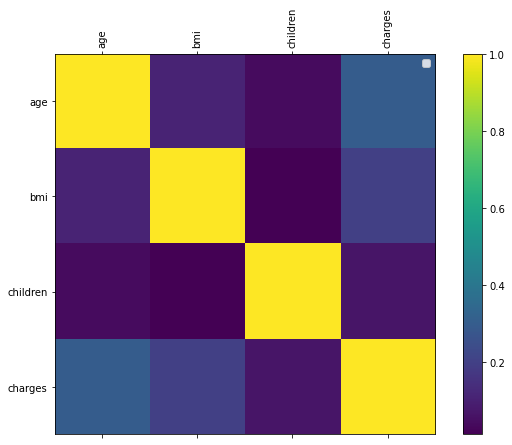

In [11]:
def plot_corr(df,size=(10,7)):
  corr = df.corr()
  fig,ax = plt.subplots(figsize=(size))
  ax.legend()
  cax=ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)),corr.columns, rotation='vertical')
  plt.yticks(range(len(corr.columns)),corr.columns)

plot_corr(insurance);